#  VQC-based QNN for Classifier

Created by Muhamad Akrom m.akrom@dsn.dinus.ac.id

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1212\3658511674.py:13: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


### 1. Load dataset (iris)

In [2]:
data_iris = load_iris()
x = data_iris.data
y = data_iris.target

# Hanya gunakan class 0 dan 1
indexes = np.array([i for (i, s) in enumerate(y) if (s == 0 or s == 1)])
x = x[indexes]
y = 2 * y[indexes] - 1

### 2. Pre-processing

- EDA (skip)
- Normalization (skip)
- Cross-validation (skip), and others...

In [3]:
# Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
# Ofv

objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

### 3. VQC Model

In [5]:
# Parameter
backend          = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend)
optimizer        = COBYLA(maxiter=100)
num_qubits       = 4

# Encoding-Ansatz
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
ansatz      = RealAmplitudes(num_qubits=num_qubits, reps=1)

# Vqc
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1212\3395584176.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend          = Aer.get_backend('qasm_simulator')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1212\3395584176.py:3: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)


### 4. Training

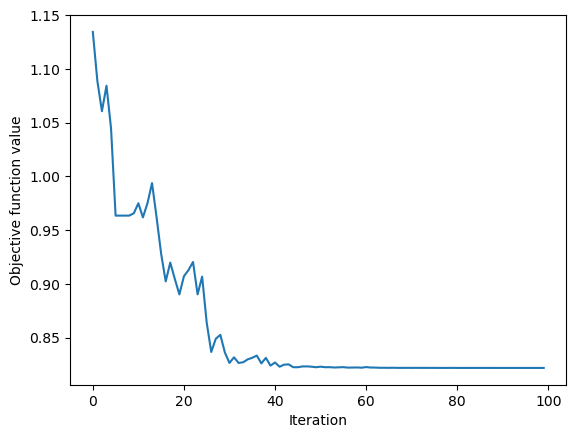

In [6]:
vqc.fit(x_train, y_train)

### 5. Evaluation

In [7]:
y_pred_tr = vqc.predict(x_train)
y_pred_ts = vqc.predict(x_test)

acc_tr = np.round(accuracy_score(y_train, y_pred_tr), 3)
acc_ts = np.round(accuracy_score(y_test, y_pred_ts), 3)
print("Accuracy Train :", acc_tr)
print("Accuracy Test  :", acc_ts)

Accuracy Train : 0.7
Accuracy Test  : 0.9
